* https://www.kaggle.com/c/bike-sharing-demand/data
* https://steadiness-193.tistory.com/228?category=956810

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
train = pd.read_csv('train.csv', parse_dates=[0])
print(train.shape)

train.head(5)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test=pd.read_csv('test.csv', parse_dates=[0])
print(test.shape)

test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### 누락값 확인

In [4]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [5]:
def down_cast(df) :
    
    columns = df.columns
    df_list = []
    
    for column in columns :
        if df[column].dtype == 'int64':
            df[column] = pd.to_numeric(df[column], downcast='integer')
            
        elif df[column].dtype == 'float64':
            df[column] = pd.to_numeric(df[column], downcast='float')
        
        df_list.append(df[column])
    
    return pd.concat(df_list, axis=1)

In [6]:
train = down_cast(train)
test = down_cast(test)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int8          
 2   holiday     10886 non-null  int8          
 3   workingday  10886 non-null  int8          
 4   weather     10886 non-null  int8          
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  int8          
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  int16         
 10  registered  10886 non-null  int16         
 11  count       10886 non-null  int16         
dtypes: datetime64[ns](1), float32(3), int16(3), int8(5)
memory usage: 329.7 KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int8          
 2   holiday     6493 non-null   int8          
 3   workingday  6493 non-null   int8          
 4   weather     6493 non-null   int8          
 5   temp        6493 non-null   float32       
 6   atemp       6493 non-null   float32       
 7   humidity    6493 non-null   int8          
 8   windspeed   6493 non-null   float32       
dtypes: datetime64[ns](1), float32(3), int8(5)
memory usage: 158.6 KB


In [9]:
year = train.datetime.dt.year
month = train.datetime.dt.month
day = train.datetime.dt.day
hour = train.datetime.dt.hour
dayofweek = train.datetime.dt.dayofweek
dayofweek_humanized = train.datetime.dt.day_name()

In [10]:
train.insert(1,'year',year)
train.insert(2,'month',month)
train.insert(3,'day',day)
train.insert(4,'hour',hour)
train.insert(5,'dayofweek',dayofweek)
train.insert(6,'dayofweek_humanized',dayofweek_humanized)

train.head(2)

,datetime,year,month,day,hour,dayofweek,dayofweek_humanized,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,2011,1,1,0,5,Saturday,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,2011,1,1,1,5,Saturday,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [11]:
year = test.datetime.dt.year
month = test.datetime.dt.month
day = test.datetime.dt.day
hour = test.datetime.dt.hour
dayofweek = test.datetime.dt.dayofweek

In [12]:
test.insert(1,'year',year)
test.insert(2,'month',month)
test.insert(3,'day',day)
test.insert(4,'hour',hour)
test.insert(5,'dayofweek',dayofweek)


test.head(2)

,datetime,year,month,day,hour,dayofweek,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,2011,1,20,0,3,1,0,1,1,10.66,11.365,56,26.002701
1,2011-01-20 01:00:00,2011,1,20,1,3,1,0,1,1,10.66,13.635,56,0.000000


[0.    0.003 0.998 0.001 1.    0.998 0.001 0.998 0.001 0.003 0.003 0.999
 0.999 0.003 0.002 0.998 0.997 0.001 0.001 0.001 0.999 0.997 0.999 0.002
 0.002 0.001 0.997 0.999]


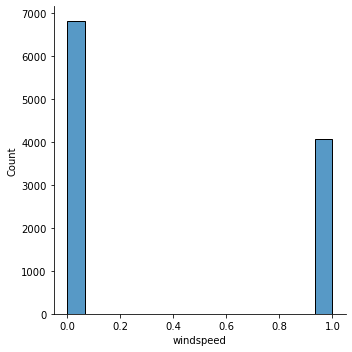

In [16]:
# 풍속 소수점 분포도
windspeed_under0 = train.windspeed.apply(lambda x:x - int(x))
print(windspeed_under0.unique().round(3))
sns.displot(windspeed_under0)

연속형보다는 범주형에 가깝다는 것으로 해석될 수 있다.

In [17]:
# 정수로 반올림해서 pointplot

In [18]:
# train 풍속 랜덤포레스트로 찾기
windspeed_0 = train[train.windspeed == 0]
windspeed_not0 = train[train.windspeed != 0]

feature_cols = ['year','month','day', 'hour','season','holiday', 'weather', 'temp','atemp', 'humidity']
label_col = 'windspeed'

X_train = windspeed_not0[feature_cols]
y_train = windspeed_not0[label_col]
X_test = windspeed_0[feature_cols]

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state=50)

rf.fit(X_train, y_train)

predicted = rf.predict(X_test)

windspeed_0['windspeed'] = predicted

train = pd.concat([windspeed_0, windspeed_not0], axis=0)
train = train.sort_values(by='datetime')

train['windspeed_int']= train['windspeed'].apply(lambda x: int(round(x)))

(train.windspeed==0).sum()

<ipython-input-18-c57128223501>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windspeed_0['windspeed'] = predicted


0

1. 풍속이 11 ~ 20와  22 ~ 30일때가 10이하일 때보다 대여량이 많다.
2. 풍속이 35이상 부터는 신뢰도가 높지 않다.
3. 풍속이 과하게 높을 경우엔 대여량이 낮다.
4. windspeed_int 컬럼도 머신러닝에 feature로 이용한다.

In [19]:
windspeed_0_t = test[test.windspeed == 0]
windspeed_not0_t = test[test.windspeed != 0]

feature_cols = ['year','month','day', 'hour','season','holiday', 'weather', 'temp','atemp', 'humidity']
label_col = 'windspeed'

X_train = windspeed_not0_t[feature_cols]
y_train = windspeed_not0_t[label_col]
X_test = windspeed_0_t[feature_cols]

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state=50)

rf.fit(X_train, y_train)

predicted_t = rf.predict(X_test)

windspeed_0_t['windspeed'] = predicted_t

test = pd.concat([windspeed_0_t, windspeed_not0_t], axis=0)
test = test.sort_values(by='datetime')

test['windspeed_int']= test['windspeed'].apply(lambda x: int(round(x)))

<ipython-input-19-345b3dabfcf9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windspeed_0_t['windspeed'] = predicted_t


## 온도 및 체감온도

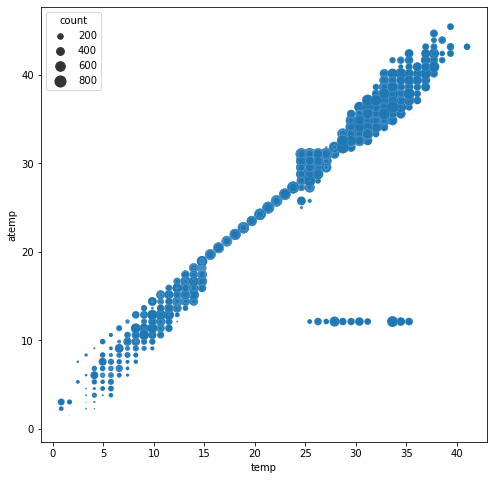

In [20]:
ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(x='temp', y='atemp', size='count', data=train,sizes=(0, 150))

1. 온도와 체감온도는 비례하는 경향을 나타내고 있다.
2. size에 count를 넣어서 보니, 온도와 체감온도가 낮을 때보다 높을 때 자전거 대여량이 많아진다.
3. 박스체크된 부분은 입력값에서 문제가 있어보인다.
온도가 25도인데 체감온도가 15도이긴 어렵기 때문이다.

In [21]:
# 체감온도 이상치 찾기
train[(train.temp > 23) & (train.atemp < 15)].head()

,datetime,year,month,day,hour,dayofweek,dayofweek_humanized,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,windspeed_int
8991,2012-08-17 00:00:00,2012,8,17,0,4,Friday,3,0,1,1,27.879999,12.12,57,11.0014,21,67,88,11
8992,2012-08-17 01:00:00,2012,8,17,1,4,Friday,3,0,1,1,27.059999,12.12,65,7.0015,16,38,54,7
8993,2012-08-17 02:00:00,2012,8,17,2,4,Friday,3,0,1,1,27.059999,12.12,61,8.9981,4,15,19,9
8994,2012-08-17 03:00:00,2012,8,17,3,4,Friday,3,0,1,1,26.240000,12.12,65,7.0015,0,6,6,7
8995,2012-08-17 04:00:00,2012,8,17,4,4,Friday,3,0,1,1,26.240000,12.12,73,11.0014,0,9,9,11


In [22]:
weird_idx = train[(train.temp > 23) & (train.atemp <12.5)].index.values
weird_idx

array([8991, 8992, 8993, 8994, 8995, 8996, 8997, 8998, 8999, 9000, 9001,
       9002, 9003, 9004, 9005, 9006, 9007, 9008, 9009, 9010, 9011, 9012,
       9013, 9014], dtype=int64)

In [23]:
weird_atemp_df = train[train.index.isin(weird_idx)]
not_weird_atemp_df = train.drop(weird_idx)

feature_names = ['year','month','day','hour', 'season','weather','temp','humidity','windspeed']
label_name = 'atemp'

X_train = not_weird_atemp_df[feature_names]
y_train = not_weird_atemp_df[label_name]
X_test = weird_atemp_df[feature_names]

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state=50)

rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
weird_atemp_df['atemp'] = predictions

train = pd.concat([weird_atemp_df, not_weird_atemp_df],axis=0)
train = train.sort_values(by='datetime')



<ipython-input-23-1fea4584c070>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weird_atemp_df['atemp'] = predictions


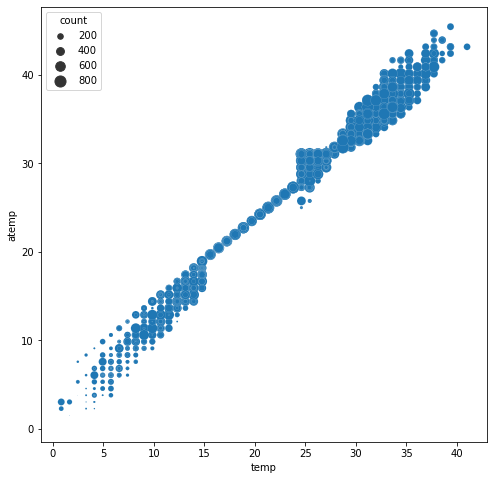

In [24]:
# 다시 온도및 체감온도 시각화
ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(x='temp', y='atemp', size='count', data=train,sizes=(0, 150))

In [25]:
# 체감온도와 온도의 차이에 따른 대여량(count)
train['temp_diff'] = train['atemp'] - train['temp']
train['temp_diff'] = train['temp_diff'].round()

# 체감온도에서 온도를 빼준 뒤 반올림 한 값을 temp_diff 컬럼으로 정의해줬다.
train['temp_diff']

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
10881    4.0
10882    3.0
10883    2.0
10884    3.0
10885    4.0
Name: temp_diff, Length: 10886, dtype: float64

Text(0.5, 0, 'atemp - temp')

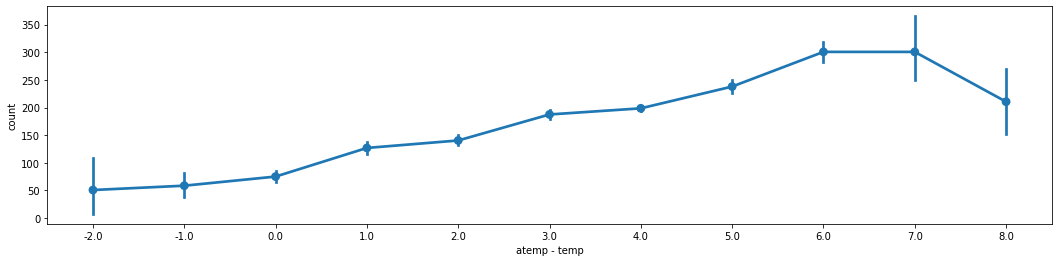

In [26]:
# temp_diff 컬럼의 값을 범주형처럼 보고 그 범주에 따른 대여량을 시각화해보자
ax = plt.subplots(figsize=(18, 4))

ax = sns.pointplot(x='temp_diff', y='count', data=train)
ax.set_xlabel('atemp - temp')

* -2, -1과 7, 8의 신뢰도가 높지 않은데, 그 이유를 value_counts()를 이용해서 살펴보자

In [27]:
train['temp_diff'].value_counts()

 4.0    5230
 3.0    1932
 2.0    1333
 5.0    1106
 1.0     581
 6.0     448
 0.0     195
 7.0      32
-1.0      23
-2.0       4
 8.0       2
Name: temp_diff, dtype: int64

In [28]:
train.loc[train['temp_diff'] <= -1,'temp_diff'] = 0
train.loc[train['temp_diff'] >= 7,'temp_diff'] = 6

Text(0.5, 0, 'atemp - temp')

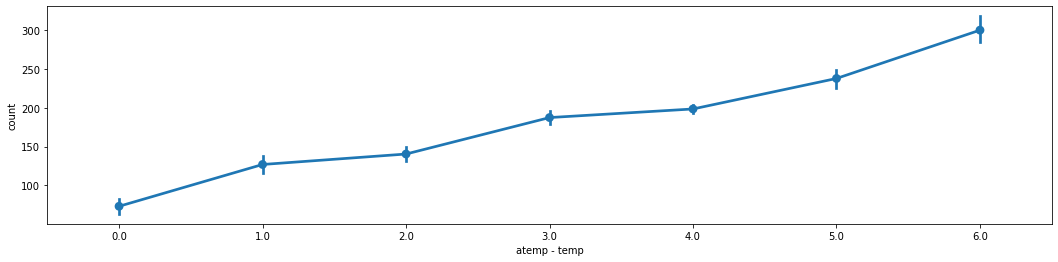

In [29]:
ax = plt.subplots(figsize=(18, 4))

ax = sns.pointplot(x='temp_diff', y='count', data=train)
ax.set_xlabel('atemp - temp')

* 체감온도에서 온도를 뺀 값이 클 수록 (온도보다 더 덥다고 느낄수록) 자전거 대여량이 높다.

In [30]:
# 체감온도와 온도의 차이에 따른 대여량(count)
test['temp_diff'] = test['atemp'] - test['temp']
test['temp_diff'] = test['temp_diff'].round()

# 체감온도에서 온도를 빼준 뒤 반올림 한 값을 temp_diff 컬럼으로 정의해줬다.
test['temp_diff']

0       1.0
1       3.0
2       3.0
3       2.0
4       2.0
       ... 
6488    2.0
6489    2.0
6490    2.0
6491    3.0
6492    3.0
Name: temp_diff, Length: 6493, dtype: float32

In [31]:
test['temp_diff'].value_counts()

 4.0     2900
 3.0     1251
 2.0      865
 5.0      603
 1.0      474
 6.0      218
 0.0      110
 7.0       38
 8.0       12
 9.0        9
 11.0       5
-1.0        4
 10.0       3
-2.0        1
Name: temp_diff, dtype: int64

In [32]:
test.loc[test['temp_diff'] <= -1,'temp_diff'] = 0
test.loc[test['temp_diff'] >= 7,'temp_diff'] = 6

In [33]:
test['temp_diff'].value_counts()

4.0    2900
3.0    1251
2.0     865
5.0     603
1.0     474
6.0     285
0.0     115
Name: temp_diff, dtype: int64

## 날씨에 따른 대여량(count)

<AxesSubplot:xlabel='weather', ylabel='count'>

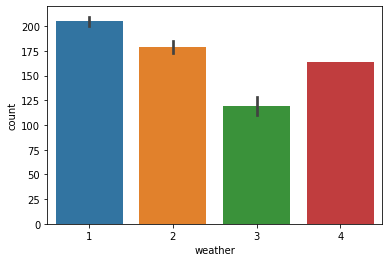

In [34]:
sns.barplot(data=train, x='weather', y='count')

날씨가 좋을 수록 (1, 2) 대여를 많이하는데
이상하게 4번 날씨에도 대여량이 높은 편이다.
더 이상한 점은 4번 날씨에는 신뢰 구간 막대가 안보인다는 것이다.

In [35]:
train.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<AxesSubplot:>

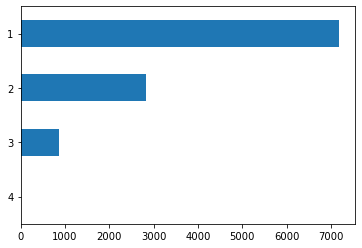

In [36]:
train.weather.value_counts().sort_values().plot.barh()

## 시간에 따른 회원(registered), 비회원(casual)의 대여량

이번엔 count가 아니라 casual과 registered를 나눠서 살펴본다.
맨 위는 기존의 count를 나타낸 것이다.
위 그래프를 보면 다음의 내용을 파악할 수 있다.


1. 비회원(casual)과 회원과의 대여 경향이 매우 다르다.
2. 비회원은 주로 주말 09-18시에 많이 빌린다.
3. 회원은 주로 출퇴근 시간(06-09, 17-20)에 많이 빌린다.
4. 대여량의 절대량은 회원이 더 높다.


즉, 그냥 count를 예측하는 것보다 casual과 registered를 각각 예측해서 더한다면 정답에 가까워 질 수 있는 것이다.

https://steadiness-193.tistory.com/230?category=956810

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

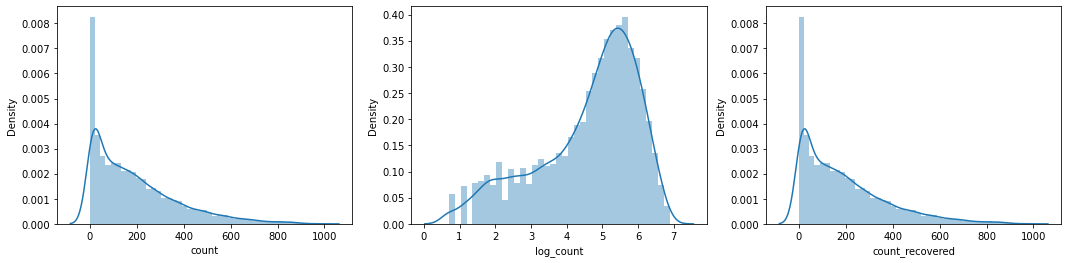

In [44]:
# count, casual, registered
train['log_count'] = np.log(train['count'] + 1)
train['count_recovered'] = np.exp(train['log_count']) -1

fig, axes = plt.subplots(1,3)
fig.set_size_inches(18, 4)

ax1= sns.distplot(train['count'], ax=axes[0])
ax2=sns.distplot(train['log_count'], ax=axes[1])
ax3=sns.distplot(train['count_recovered'], ax=axes[2])

plt.show()

In [45]:
train['log_casual'] = np.log1p(train['casual'])
train['log_registered'] = np.log1p(train['registered'])

## Random Forest

In [101]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500,
                              max_depth=99,
                              max_features=0.8,
                              n_jobs=-1, random_state=50)

model

RandomForestRegressor(max_depth=99, max_features=0.8, n_estimators=500,
                      n_jobs=-1, random_state=50)

* train 데이터셋의 count를 바로 이용하지 않고 casual과 registered 컬럼을 이용한다.

* 다만, 각각 log1p를 씌운 log_casual, log_registered를 활용하고 추후에 exp로 원래 값으로 돌려 받은 뒤 그 두개를 합친 count를, 기존(정답) count와 비교해서 점수를 측정한다.

## casual

In [102]:
feature_names = ['season', 'holiday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed_int', 'year', 'hour', 'dayofweek',
       'temp_diff']

label_name = 'log_casual'

In [103]:
X_train = train[feature_names]
y_log_casual_train = train[label_name]

X_test = test[feature_names]

In [104]:
from sklearn.model_selection import cross_val_predict

y_log_casual_predict = cross_val_predict(model, X_train, y_log_casual_train, cv=20)
y_log_casual_predict[:10]

array([1.61704168, 1.26764879, 1.30235124, 1.06912852, 0.49428893,
       0.35811441, 0.590261  , 0.82180989, 1.47390935, 3.2003003 ])

In [105]:
y_casual_predict = np.exp(y_log_casual_predict) - 1
y_casual_predict[:10]

array([ 4.03816373,  2.55249007,  2.67793421,  1.91283991,  0.63933214,
        0.43062929,  0.80445932,  1.2746129 ,  3.36627112, 23.53989853])

## registered

In [106]:
feature_names = ['season', 'holiday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed_int', 'year', 'hour', 'dayofweek',
       'temp_diff']

label_name = 'log_registered'

In [107]:
X_train = train[feature_names]
y_log_registered_train = train[label_name]

X_test = test[feature_names]

In [108]:
from sklearn.model_selection import cross_val_predict

y_registered_log_predict = cross_val_predict(model, X_train, y_log_registered_train, cv=20)
y_registered_log_predict[:10]

array([3.12970898, 3.06523936, 2.91585819, 2.17786949, 1.4217665 ,
       1.05890407, 1.41670798, 2.35419682, 3.38962549, 4.02205686])

In [109]:
y_registered_predict = np.exp(y_registered_log_predict) - 1
y_registered_predict[:10]

array([21.86732373, 20.43959317, 17.4646517 ,  7.82747919,  3.14443514,
        1.88320947,  3.12352336,  9.52966827, 28.65484423, 54.81579327])

y_predict

In [110]:
y_predict = y_casual_predict + y_registered_predict
y_predict[:10]

array([25.90548745, 22.99208324, 20.14258591,  9.7403191 ,  3.78376728,
        2.31383876,  3.92798269, 10.80428117, 32.02111535, 78.3556918 ])

진짜 정답 : y_train

In [111]:
y_train = train['count']

Mean Squared Logarithmic Error

In [112]:
from sklearn.metrics import mean_squared_log_error

score = mean_squared_log_error(y_predict, y_train)
score = np.sqrt(score)
score

0.34674767003337026

In [100]:
print(train.shape)
print(test.shape)

(10886, 25)
(6493, 16)


In [113]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500,
                              max_depth=99,
                              max_features=0.8,
                              n_jobs=-1, random_state=50)

model

RandomForestRegressor(max_depth=99, max_features=0.8, n_estimators=500,
                      n_jobs=-1, random_state=50)

In [115]:
feature_names = ['season', 'holiday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed_int', 'year', 'hour', 'dayofweek',
       'temp_diff']

label_name_cas = 'log_casual'
label_name_reg = 'log_registered'

In [116]:
X_train = train[feature_names]
y_log_casual_train = train[label_name_cas]
y_log_registered_train = train[label_name_reg]

X_test = test[feature_names]

In [118]:
# fit
model.fit(X_train, y_log_casual_train)

RandomForestRegressor(max_depth=99, max_features=0.8, n_estimators=500,
                      n_jobs=-1, random_state=50)

In [119]:
# predict
log_casual_predict = model.predict(X_test)

In [120]:
casual_predict = np.exp(log_casual_predict) - 1
casual_predict[:10]

array([1.21991331, 0.45941188, 0.94651852, 0.507806  , 0.39343589,
       0.15738526, 1.05910167, 4.42852994, 6.27064338, 5.65851283])

In [121]:
# fit
model.fit(X_train, y_log_registered_train)

RandomForestRegressor(max_depth=99, max_features=0.8, n_estimators=500,
                      n_jobs=-1, random_state=50)

In [122]:
# predict
log_registered_predict = model.predict(X_test)

In [123]:
registered_predict = np.exp(log_registered_predict) - 1
registered_predict[:10]

array([ 10.24317392,   4.5422004 ,   1.63745131,   1.62709065,
         1.61338856,   5.60647152,  37.72633769, 101.62258056,
       225.83640167, 128.79594983])

최종 예측값

In [124]:
predictions = casual_predict + registered_predict
predictions[:10]

array([ 11.46308722,   5.00161228,   2.58396983,   2.13489665,
         2.00682446,   5.76385678,  38.78543935, 106.0511105 ,
       232.10704505, 134.45446266])

저장 후 제출

In [125]:
submission = pd.read_csv('./dataset/sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [126]:
submission['count'] = predictions
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.463087
1,2011-01-20 01:00:00,5.001612
2,2011-01-20 02:00:00,2.583970
3,2011-01-20 03:00:00,2.134897
4,2011-01-20 04:00:00,2.006824


In [127]:
submission.to_csv('RandomForest_casual_registered.csv', index=False)